In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import tree
from sklearn.tree import plot_tree

In [26]:
df = pd.read_csv('datasets/bill_authentication.xls')
df

Variance  Skewness  Curtosis  Entropy  Class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]

In [27]:
x = df.drop('Class', axis = 1)
y = df['Class']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [29]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [30]:
y_pred = classifier.predict(x_test)

In [31]:
cmatrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
print(cmatrix)
print(classification_report)

[[143   3]
 [  3 126]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       146
           1       0.98      0.98      0.98       129

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [32]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=50)
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=50)

In [33]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9781818181818182


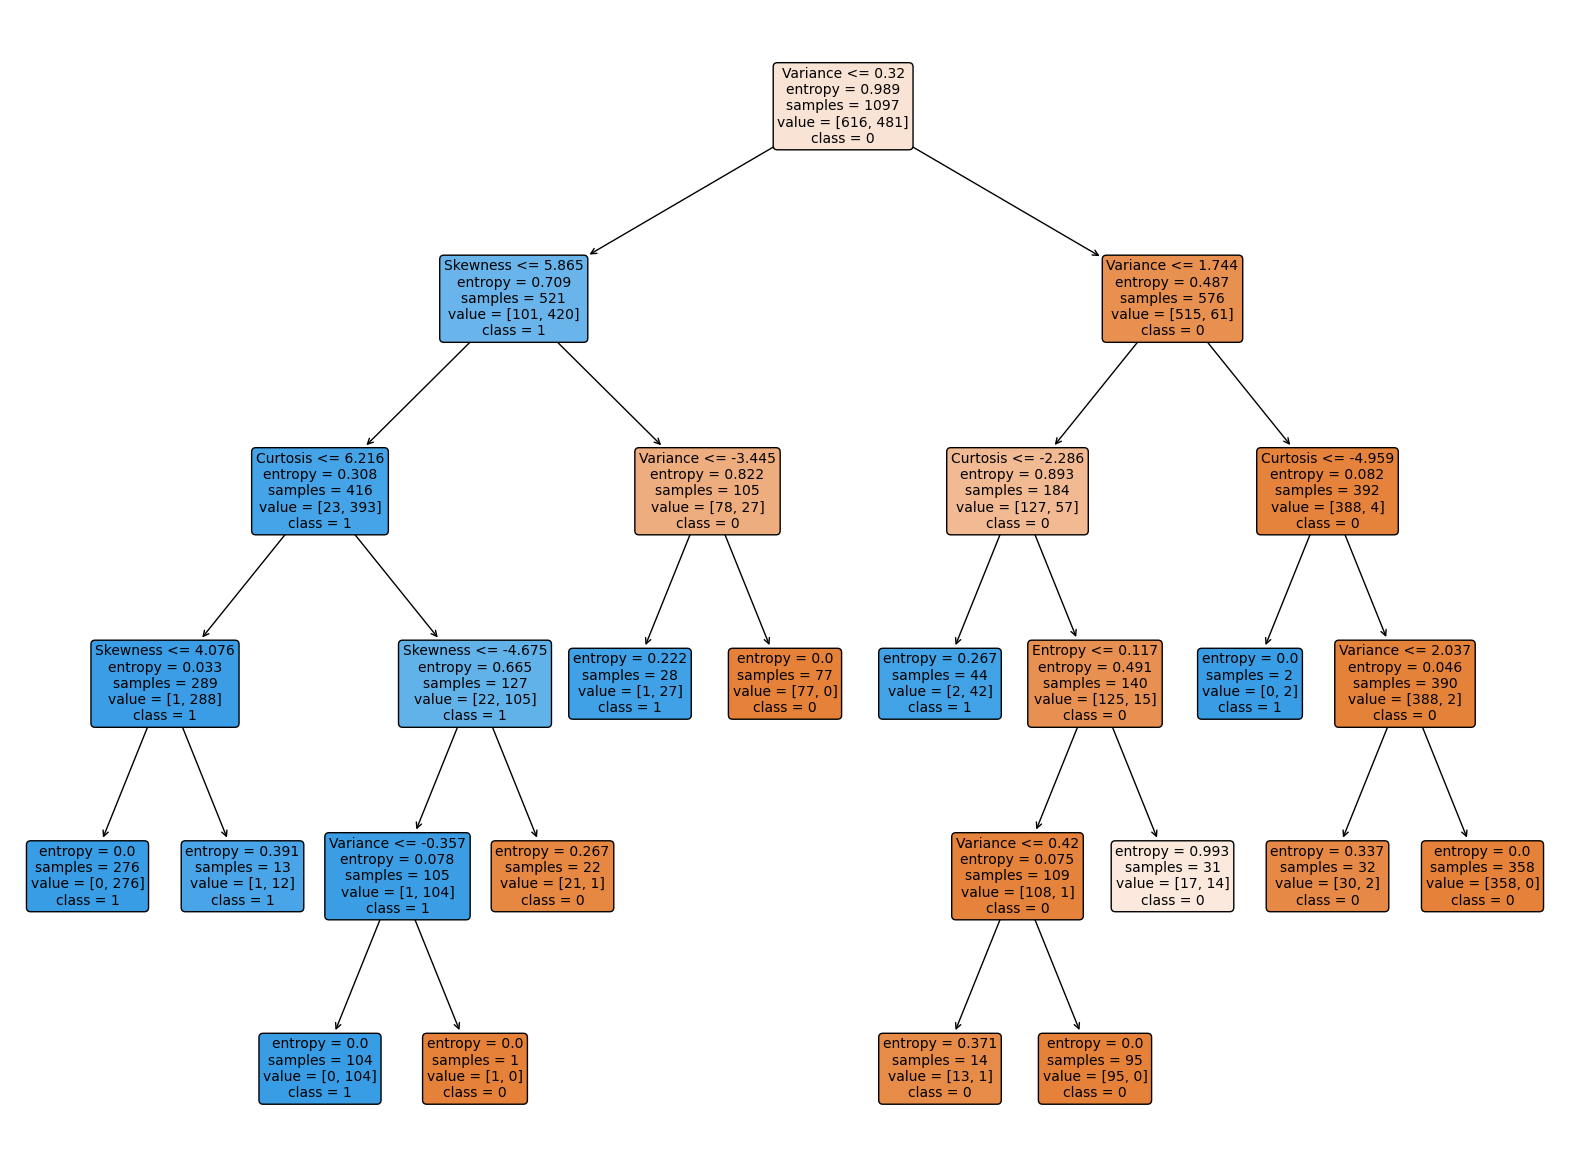

In [34]:
plt.figure(figsize=(20, 15))
plot_tree(
    tree,
    feature_names=x.columns,
    class_names=list(map(str, tree.classes_)),
    filled=True,
    rounded=True,
    fontsize=10,
)
plt.savefig('plots/ID3.jpg', format='jpg', bbox_inches='tight')